In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import mnist

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from PIL import Image

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Get Data

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
# First Training Image
first_image = train_images[0]
first_label = train_labels[0]

print(f'Label: {first_label}\n')

for i in train_images[0]:
    for j in i: 
        j = str(j).strip()
        if len(j) == 1:
            j += '  '
        elif len(j) == 2:
            j += ' '
        print(j, end=' ')
    print()

Label: 5

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0 

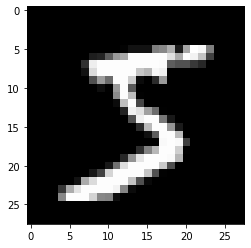

In [6]:
plt.imshow(train_images[0], cmap='gray')  # First Image

In [7]:
# Scale the data

ss = StandardScaler()

train_images = np.array([ss.fit_transform(image) for image in train_images])
test_images = np.array([ss.fit_transform(image) for image in test_images])

In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
# Flatten all 28x28 images to 784 vector

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [11]:
# One-Hot Encode Dependent Variable

train_labels = pd.get_dummies(train_labels, drop_first=False).values
test_labels = pd.get_dummies(test_labels, drop_first=False).values

In [12]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


## Model Making

In [13]:
# <<-- Make ANN Model -->>

ann = Sequential()

layer1 = Dense(units=64, activation='relu')  # First Hidden Layer
layer2 = Dense(units=64, activation='relu')  # Second Hidden Layer
output_layer = Dense(units=10, activation='softmax')  # Output Layer

# Add all layers to ANN model
ann.add(layer1)
ann.add(layer2)
ann.add(output_layer)

In [14]:
# <<-- Compile and Train ANN --->>

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')  # Compile ANN
ann.fit(train_images, train_labels, batch_size=32, epochs=10) # Train ANN

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2304 - accuracy: 0.9303
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1037 - accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0463 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.022

In [15]:
# Evaluate Test Data

loss, accuracy = ann.evaluate(x=test_images, y=test_labels)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9719
Loss: 0.12091118097305298
Accuracy: 0.9718999862670898


In [16]:
# <<-- Save Model in HDF5 file format -->>

ann.save("Model.h5")

In [17]:
# Predict First 3 images

predictions = ann.predict_classes(test_images[:3])  # This method of predicting gives depereciation warning
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1], dtype=int64)

In [18]:
predictions = np.argmax(ann.predict(test_images[:3]), axis=-1) # This method does not of predicting gives depereciation warning
predictions

array([7, 2, 1], dtype=int64)

In [19]:
# Compare predictions with test results

pd.DataFrame(data=list(zip(test_labels[:3], predictions)), index=[1, 2, 3], columns=['Real Values', 'Predicted Values'])

,Real Values,Predicted Values
1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",7
2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",2
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1


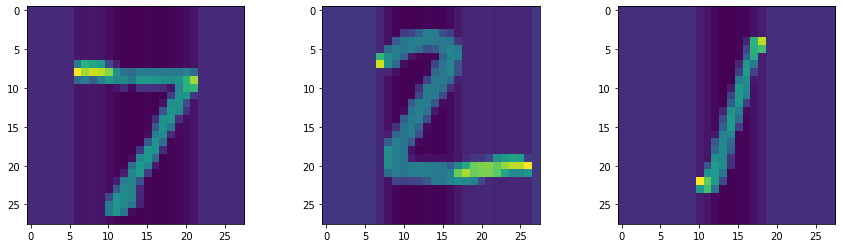

In [20]:
# Compare predicted results with the images

image1 = test_images[0].reshape((28, 28))
image2 = test_images[1].reshape((28, 28))
image3 = test_images[2].reshape((28, 28))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax[0].imshow(image1)
ax[1].imshow(image2)
ax[2].imshow(image3)